# Programming Data Analysis Project 2
***
G00388113 John Loughnane. Programming for Data Analysis is a module of the Higher Diploma in Data Analytics in Computing.

## Data Analysis Project on Wisconsin Breast Cancer Original Dataset

In [40]:
from msilib.schema import Class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.neighbors as nei
from sklearn import svm
import seaborn as sns
import sklearn.model_selection as mod
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 1. Overview of Wisconsin Breast Cancer Dataset
***

The second Project in the Programming for Data Analysis module is on the Wisconsin Breast Cancer Dataset. I will be looking at the the Original Dataset which was released on the 15th July 1992. The Breast Cancer data was collected by Dr. William H. Wolberg (physician) in University of Wisconsin Hospitails, Madison, Wisconsin, U.S.A. It was collected over a 10 month period from January 1989 to November 1991. The data consists of 11 attributes of which 1 attribute is an identifier, 9 attributes are independent variables and 1 attribute is a dependent variable which is the *Class* attribute. Listed below are all thhe attributes in the dataset.

|  Attribute | Domain |
| --- | --- | 
| Sample code number | id number |
| Clump Thickness | 1 - 10 |
| Uniformity of Cell Size | 1 - 10 |
| Uniformity of Cell Shape | 1 - 10 |
| Marginal Adhesion | 1 - 10 |
| Single Epithelial Cell Size | 1 - 10 |
| Bare Nuclei | 1 - 10 |
| Bland Chromatin | 1 - 10 |
| Normal Nucleoli | 1 - 10 |
| Mitoses |  1 - 10 |
| Class: | (2 for benign, 4 for malignant) |

Attributes Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, Mitoses are integers between 1 and 10. So, these are discrete variables and have been scored from 1 to 10. The Class attribute is either one of two values 2 (Benign) or 4 (malignant), so each instance or row is either Benign or malignant. 
There are 699 rows in the dataset with class distribution of 458 Benign and 241 malignant. For the Bare Nuclei attribute there are 16 missing values. I will need to address these in the clean data phase.<br/>
The aim of the project is to carry out the following tasks on the Wisconsin Breast Cancer Dataset :

- 1. Provide an overview of the Dataset
- 2. Review literature on analysis carried out on the dataset and Classifiers used 
- 3. Statistical Analysis
- 4. Use a range of Classifiers and train the data (Modelling)
- 5. Compare the results on the Classifiers obtained from the Modeeling phase with the literature review
- 6. Discuss how the Wisconsin Breast Cancer Original Dataset could be extended

## 2. Data Understanding
***

The Data Understanding phase is to get a better feel of the dataset. 

- 1. Read in the Dataset
- 2. Check the first rows of the dataset
- 3. Check the attribute types
- 4. Check the number of rows and columns
- 5. Check the summary statistics of each attribute

### Read in the dataset

In [41]:
# Add the Column names and read in the Wisconsin breast Cancer Dataset
colnames=['Sample code number id number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class' ]
#index=('Iris Setosa', 'Iris Versicolour', 'Iris Virginica')
df = pd.read_csv("breast-cancer-wisconsin.data",names=colnames)

### Check the first rows of the dataset

In [42]:
# Check in the first 5 and last 5 rows of the data to see how it looks
df

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


### Check the attribute types

In [43]:
# Check what type each attribute is 
df.dtypes

Sample code number id number     int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                     object
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

We can see that all attributes are integers apart from 'Bare Nuclei' which is of type Object. This is interesting but we know from the Dataset readme file that 'Bare Nuclei' has missing values so there maybe other characters in that column and so it was was given type of Object. We will need to change this to integer later on. 

In [44]:
# Check teh column names of the dataset
print(df.columns)

Index(['Sample code number id number', 'Clump Thickness',
       'Uniformity of Cell Size', 'Uniformity of Cell Shape',
       'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
       'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [45]:
#breastCancer_describe = df.head(10)
#print(breastCancer_describe)

### Check the number of rows and columns

In [46]:
# Check number rows and columns
print(df.shape)

# Count by Class attribute so we can see number of Benigns and Malignant
print(df["Class"].value_counts())

(699, 11)
2    458
4    241
Name: Class, dtype: int64


Above we can see there are 458 rows of **Class 2** which are Benign and 241 rows of **Class 4** which are Malignant.

### Check the summary statistics of each attribute

In [47]:
# Run the describe function to check the summary statistice (mean, standard deviation, min, max & inter quartile values)
summary_all = df.describe().T
print(summary_all)

                              count          mean            std      min  \
Sample code number id number  699.0  1.071704e+06  617095.729819  61634.0   
Clump Thickness               699.0  4.417740e+00       2.815741      1.0   
Uniformity of Cell Size       699.0  3.134478e+00       3.051459      1.0   
Uniformity of Cell Shape      699.0  3.207439e+00       2.971913      1.0   
Marginal Adhesion             699.0  2.806867e+00       2.855379      1.0   
Single Epithelial Cell Size   699.0  3.216023e+00       2.214300      1.0   
Bland Chromatin               699.0  3.437768e+00       2.438364      1.0   
Normal Nucleoli               699.0  2.866953e+00       3.053634      1.0   
Mitoses                       699.0  1.589413e+00       1.715078      1.0   
Class                         699.0  2.689557e+00       0.951273      2.0   

                                   25%        50%        75%         max  
Sample code number id number  870688.5  1171710.0  1238298.0  13454352.0  
Cl

Above shows the summary statistics of the attibutes of the dataset. The mean value for Clump Thickness is 4.42, Uniformity of Cell Size is 3.13, Uniformity of Cell Shape is 3.2, Marginal Adhesion is 2.8, Single Epithelial Cell Size is 3.2, Bland Chromatin is 3.4, Normal Nuclei is 2.86 and Mitoses is 1.6.  

## 3. Literature review on Classifiers
***

I have chosen 3 journals on the Wisconsin Breast Cancer Original dataset to review. 

### Literature Review 1

#### Article

Analysis of Wisconsin Breast Cancer original dataset using data mining and machine learning algorithms for breast cancer prediction

#### Source of article
Journal of Science, Technology & Environment Informatics

#### Background

The Journal outlines the analysis carried out on the Wisconsin Breast Cancer original dataset using data mining and machine learning algorithms for breast cancer prediction. <br/>
It was carried out by the Dept. of Computer Science and Engineering, Pabna University of Science and Technology in Bangladesh.
The researchers were Md. Toukir Ahmed, Md. Niaz Imtiaz and Animesh Karmakar. The article was first published online on the 20th July 2020. The main focus of the paper was to use different machine learning classification algoritims to correctly predict the target Class. Then compare the different classifiers and find the most effective classifier in predicting the target class. 

#### URL
https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf

**Classifiers used in the analysis :**
- Naïve Bayes 
- Support Vector Machine (SVM)
- Multilayer Perceptron (MLP)
- J48
- Random Forest

#### Insights

The paper indicates the importance of Performance metrics in order to find the best classifier. This is interesting as there are 10 performance parameters. These are Accuracy, Sensitivity, Specificity, Kappa statistics, Precision, Recall, F-measure, Matthew’s Correlation Coefficient (MCC), Receiver Operating Characteristic (ROC) Area and Precision-Recall Curves (PRC).
These are calculated froma confusion matrix :

| |Predicted YES | Predicted NO | 
| :---: | :---: | :---: |
| **Actual YES** | TP | FN | 
| **Actual NO** | FP | TN |

- TP represents the number of correctly classified positive instances.
- FP represents the number of misclassified positive instances.
- FN represents the number of misclassified negative instances.
- TN represents the number of correctly classified negative instances.

The main thing to take away is to use these performance parameters to compare the results of each classifier and from that determine the best classifier.

#### Method and Procedures

When testing each classifier they used 10 fold cross validation where the dataset is divided into 10 parts where 9 parts are used for training and one tenth for testing. This is carried out 10 times and each time a different one tenth is reserved for testing. The pereformance parameters used were accuracy, sensitivity, specificity, precision, Recall, ROC, PRC area.
It was found the best performing classifier was Naïve Bayes.<br/>
Next they removed one or two attributes and ran Naïve Bayes on the dataset again. After each run the added back in the attributes they removed and removed other attributes. It was found that removing the attribute "Single Epithelial Cell Size" gave better performnace.

#### Results

| Classifier Name | Accuracy  | Kappa Statistics | Precision | Recall | measure | MCC | ROC area | POC area |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| **Naïve Bayes** | **97.2779** | **0.9403** | **0.974** | **0.973** | **0.973** | **0.941** | **0.992** | **0.992** | 
| **J48** | 94.2693 | 0.8727 | 0.943 | 0.943 | 0.943 | 0.873 | 0.965 | 0.956 |
| **Random forest** | 95.5616 | 0.9241 | 0.966 | 0.966 | 0.966 | 0.924 | 0.988 | 0.987 |
| **SMO** | 96.1318 | 0.9144 | 0.961 | 0.961 | 0.961 | 0.914 | 0.958 | 0.944 |
| **Multilayer Perceptron** | 96.1318 | 0.9144 | 0.961 | 0.961 | 0.961 | 0.914 | 0.987 | 0.986 |

                                                             Table 1

You can see from Table 1 that Naïve Bayes which is on row 1 highlighted in bold is the best classifier. The results above are before the "Single Epithelial Cell Size" attribute is removed so the results for Naïve Bayes are even marginally better than above with "Single Epithelial Cell Size" attribute removed.

#### Conclusion

Out of the five classification algorithims that were tested the Naïve Bayes is the best performer of the five. The main points I learned when checking the Classifiers is : 

- Use Performance metrics to find the best classifier
- Look at removing the "Single Epithelial Cell Size" attribute to see if performance is better
- Review the Cross Validation method to see if it should be used 

### Literature Review 2 

#### Article
Prediction of benign and malignant breast cancer using data mining techniques

#### Source of Article
Sage Journals - Journal of Algorithms & Computational Technology

#### Background

The article outlines the analysis carried out on the Wisconsin Breast Cancer original dataset using machine learning approaches
to predict  breast cancer. <br/>
The analysis and research wasd carried out by Vikas Chaurasia, Saurabh Pal and BB Tiwari

#### URL
https://journals.sagepub.com/doi/full/10.1177/1748301818756225

#### Classifiers used in the analysis :

-  Naïve Bayes
- RBF Network
- J48

#### Insights

No real insights were provided with the paper.

#### Method and Procedure

There isn't much detail on how the Classifiers were used. For example we don't know whether they tried removing attributes to see if the classifiers gave better results. Also, we don't know how many times they ran the classifiers or if they used cross validation. 

#### Results

Table 2 shows the ranking of the algorithm against the performance measures. With Naïve Bayes coming out on top followed by RBF Network and J48

| Evaluation Criteria | Naïve Bayes  | RBF Network | J48 | 
| :---: | :---: | :---: | :---: | 
| Kappa statistic (KS) | 0.9127	| 0.9093 | 0.8799 | 
| Mean absolute error (MAE) | 0.0408 | 0.0662 |	0.0694 |
| Root mean squared error (RMSE) | 0.1994 | 0.1841 | 0.2229 | 
| Relative absolute error (RAE) | 9.0336% |	14.6542% | 15.352% | 
| Root relative squared error (RRSE) | 41.9578%	| 38.7285% | 46.8927% | 

                                                   Table 2

As part of the Confusion matrix when we calculate the Accuracy, Sensitivity and Specifcity the results are in Table3. With Naïve Bayes the best followed by RBF Network and j48.

| Methods || Accuracy (%)  | Sensitivity (%) | Specificity (%) | 
| :---: | :---: | :---: | :---: | :---: | 
| **Naïve Bayes** | |**97.36** | **97.4** | **97.90** | 
| **RBF Network** | |96.77 | 97.07 | 96.23 | 
| **J48** || 93.41 | 93.4 | 90.37 | 


                                                    Table 3

#### Conclusion

I didn't learn a whole lot from how they approached the analysis or ran the classifiers. The results achieved for both Naïve Bayes and J48 are similar to the results in the first review. 

### Literature Review 3 -

#### Article

Feature Importance Score-Based Functional Link Artificial Neural Networks for Breast Cancer Classification

#### Source of Article

National Library of Medicine - National Center for Biotechnology Information

#### Background

The article outlines the analysis carried out on the Wisconsin Breast Cancer original dataset and the Diagnostic Dataset. Six Classifiers were used in the analysis and this was carried out over the two Datasets which also gives us insight into which is teh best dataset to predict Benign or Malignant. The authors Shatakshi Singh, Sunil Kumar Jangir, Manish Kumar, Madhushi Verma, Sunil Kumar, Tarandeep Singh Walia, and S. M. Mostafa Kamal.

#### URL
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8994690/

#### Classifiers used in the analysis :

- SVM	
- Naïve Bayes	
- Random Forest	
- KNN	
- MLP	
- FLANN	

#### Insights

The Wisconsin Breast Cancer Diagnostic Dataset is better and predicting whether cancer is Malignant or Benign than the Original dataset. The FLANN algorithim gives an accuarcy of 99.41% which is pretty good.

#### Method and Procedure

They used the F-score to find the significance value of each feature or attribute in the Wisconsin Breast Cancer Original dataset. They then ran the six Classifiers against 5 features, 3 features and 2 features and you can see the Accuracy results in Table 4. The best 3 predictors of Breat Cancer in the Original dataset are Bare Nuclei, Clump Thickness and Normal Nucleoli according to the analysis. The confusion matrix is also used to get the performance metrics. 

#### Results

                      
                                                         Features Accuracy
| **Methods** || 5  | 3 | 2 | 
| :---: | :---: | :---: | :---: | :---: | 
| **SVM** | | 97.14% | 97.8%	| 95.7% | 
| **Naïve Bayes** | | 96.42% | 97.14% |	97.14% | 
| **Random Forest** || 97.14% |	97.14% | 93.57% | 
| **KNN** | | 95.71% | 95.71% |	97.8% | 
| **MLP** || 95.28% | 96.85% | 94.28% | 
| **FLANN** || 97.14% |	96.88% | 96.76% |
                                                                                 
                                                               Table 4 

Table 4 shows the Accuracy results when each Classifier is run against 5, 3 and 2 features. The best Classifier is Support Vector Machine (SVM) when it is run against 3 features, the Accuracy score is 97.8%. Also, KNeighbors (KNN) Classifier has an accuracy of 97.8% with just 2 features.   

#### Conclusion

To achieve the best results each Classifier was run against 5, 3 and 2 features in turn and to analyze which combination provided the best accuracy.  

## 4. Data Preparation
***

In the Data Preparation Phase we prepare and clean the data for Statistical Analysis and Modelling phases. If we don't clean the data it will affect the results when we carry out Univariate Analysis, Bivariate Analysis and Modelling. 

### Clean Data

In [48]:
# Run the shape function to check the number of rows and columns. Then we count on Class so Benign or Malignant
print(df.shape)

print(df["Class"].value_counts())

(699, 11)
2    458
4    241
Name: Class, dtype: int64


We can see there are 699 rows and 11 columns which match what is in the notes provided with the Wisconsin Breast cancer dataset

In [49]:
# Check the type of each attribute/ variable
df.dtypes

Sample code number id number     int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                     object
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

We can see they all the attributes are integers apart from the 'Bare Nuclei' which is an object. 

In [50]:
# Check for missing values and drop them
df.dropna(inplace=True)

In [51]:
# Check if there are any dropped rows
print(df.shape)

(699, 11)


We still have 699 rows so there aren't any blank fields.

In [52]:
# assign the Bare Nuclei column to questionMarkCheck
questionMarkCheck = df["Bare Nuclei"]

type(questionMarkCheck)

pandas.core.series.Series

In [53]:
# Iterate over questionMarkCheck and print out 'True' any field that has a ?
for i in questionMarkCheck:
    if i == '?':
        print("True - There is a ? mark here")
    else:
        pass
    

True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here


There are 16 fields that have a **?** so we will remove these rows from the dataset.

In [54]:
# Remove the rows with '?' 
df = df[(df != '?').all(axis=1)]

In [55]:
# Check if rows have been removed 
print(df.shape)

print(df["Class"].value_counts())

(683, 11)
2    444
4    239
Name: Class, dtype: int64


There are now a total of 683 rows so 16 rows were removed

We need to convert the Bare Nuclei column from object dtype to int64

In [56]:
# convert Bare Nuclei from object to integer
df = df.astype({'Bare Nuclei':'int'})
#df["Bare Nuclei"] = df["Bare Nuclei"].apply(np.int64)

In [57]:
# Just check to see 'Bare Nuclei' is now 
df.dtypes

Sample code number id number    int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                     int32
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

The bare Nuclei attributes are now converted from type object to type int32. The rest of the attributes are of type int64 but int32 is fine as the values are in range 1 - 10. The data is fine now to carry out Statistical Analysis.

## 5. Statistical Analysis
***

As part of the Statistical Analysis I will be carrying out the following tasks.

- Univariate Analysis
    - Pie Chart
    - Boxplots
    
    
- Bivariate Analysis
  - Bar Plots
  - Correlation Coefficient

### Univariate Analysis

Univariate analysis is looking at one variable and understanding the distribution of values for that one value.

In [58]:
# Check the first 10 rows of data to see how it is
df.head(10)

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


#### Pie Chart

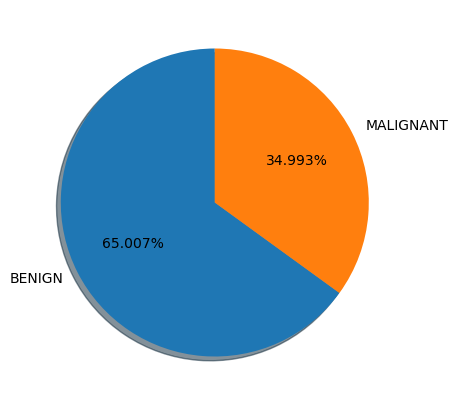

In [59]:
# Create a Pie Chart by Class to show the percentage of Benign and Malignant 
plt.figure(figsize=(5,5))
plt.pie(df['Class'].value_counts(),startangle=90,autopct='%1.3f%%',labels=['BENIGN','MALIGNANT'],shadow=True)
plt.show()

From the Pie chart we can see that 65% are Benign and 34.9% are Malignant so two thirds of the data are patients that don't have cancer and one third have Cancer.

In [60]:
summary_all = df.describe().T
print(summary_all)

                              count          mean            std      min  \
Sample code number id number  683.0  1.076720e+06  620644.047655  63375.0   
Clump Thickness               683.0  4.442167e+00       2.820761      1.0   
Uniformity of Cell Size       683.0  3.150805e+00       3.065145      1.0   
Uniformity of Cell Shape      683.0  3.215227e+00       2.988581      1.0   
Marginal Adhesion             683.0  2.830161e+00       2.864562      1.0   
Single Epithelial Cell Size   683.0  3.234261e+00       2.223085      1.0   
Bare Nuclei                   683.0  3.544656e+00       3.643857      1.0   
Bland Chromatin               683.0  3.445095e+00       2.449697      1.0   
Normal Nucleoli               683.0  2.869693e+00       3.052666      1.0   
Mitoses                       683.0  1.603221e+00       1.732674      1.0   
Class                         683.0  2.699854e+00       0.954592      2.0   

                                   25%        50%        75%         max  


Above summary statistics show the number of rows which is 683 and 8 attributes and the Class. For each attribute it gives the mean, standard deviation, min and max range, median and 25% and 75% perecentiles. 

#### Boxplots

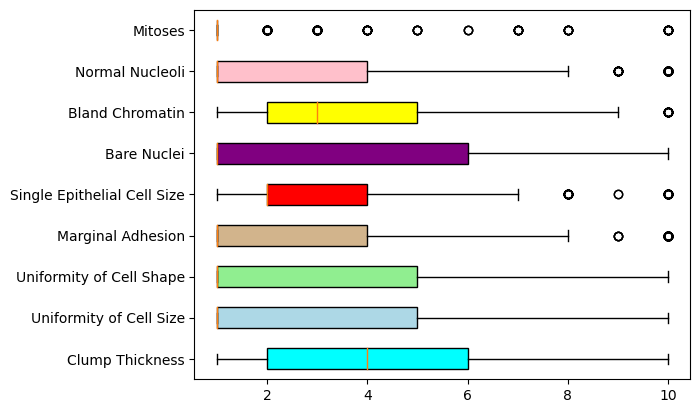

In [61]:
box_plot_data=[df['Clump Thickness'], df['Uniformity of Cell Size'], df['Uniformity of Cell Shape'], df['Marginal Adhesion'], df['Single Epithelial Cell Size'], df['Bare Nuclei'], df['Bland Chromatin'], df['Normal Nucleoli'], df['Mitoses']]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'])
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan','red', 'purple', 'yellow', 'pink', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

From the Boxplots of the data all the attributes are positively skewed. With Clump Thickness the nearest to a normal distribution. You can see that Mitoses, Normal Nucleoli, Bare Nuclei, Marginal Adhesion, Uniformity of Cell Shape and Uniformity of Cell Size having a median around 1. Normal Nucleoli, Bland Chromatin, Single Cell Size and Marginal Adhesion have some outliers but Mitoses has alot of outliers as majority of the values are 1.

In [62]:
#cols = 3
#rows = 3
#num_cols = df.select_dtypes(include='object').columns
#fig = plt.figure(figsize= (15,9))
#for i, col in enumerate(num_cols):
#    
#    ax=fig.add_subplot( rows, cols, i+1)
#    
#    sns.boxplot(x=df[col], ax=ax)
#    
#fig.tight_layout()  
#plt.show()

### Bivariate Analysis

Bivariate analysis is the analysis of two variables to see if there is a relationship or association between them. For this case I will look at each of the following variables 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli' and 'Mitoses' with the Class variable to see if there are relationships. 

In the Class attribute it would be better to change the integer values 2 and 4 to benign and Malignant so the graphs can be read more easily. 

In [63]:
# Change the integer value 2 to a string Benign and integer value 4 to String value Malignant.
df.loc[df["Class"] == 2, "Class"] = 'Benign'
df.loc[df["Class"] == 4, "Class"] = 'Malignant'

In [64]:
# Just check the Class attribute
df.dtypes

Sample code number id number     int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                      int32
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                           object
dtype: object

The Class attribute is now of type object. It will be clearer in graphs to see Benign or Malignant instead of the integer values 2 or 4.

#### Bar plots

##### Clump Thickness

In [65]:
# Exract Class and Clump Thickness from the dataframe so we can see the distribution
clumpThickness = df[['Class','Clump Thickness']].value_counts().sort_index()

In [66]:
clumpThickness

Class      Clump Thickness
Benign     1                  136
           2                   46
           3                   92
           4                   67
           5                   83
           6                   15
           7                    1
           8                    4
Malignant  1                    3
           2                    4
           3                   12
           4                   12
           5                   45
           6                   18
           7                   22
           8                   40
           9                   14
           10                  69
dtype: int64

We can see from the data that for range 1 or 2 that they are mostly Benign with 7 values Malignant.<br/>
If the data is in a bar plot it can be seen better.

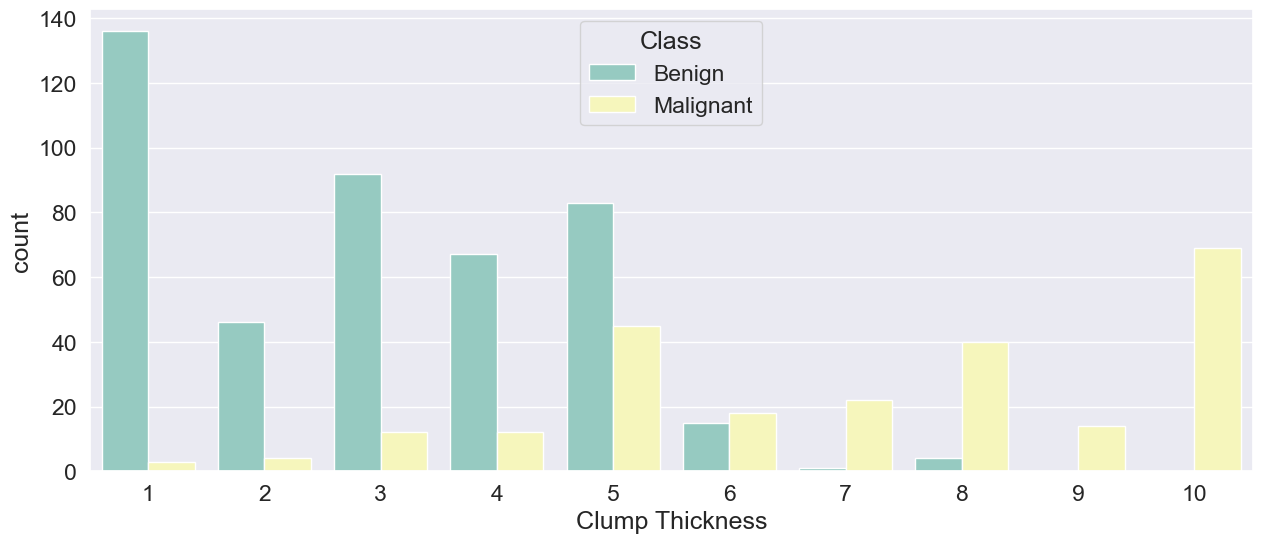

In [67]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Clump Thickness', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The plot shows if the Clump thickness value is 6 or above there is a good chance the Cancer is Malignant. Benign is mostly between 1 to 5. 

##### Bare Nuclei

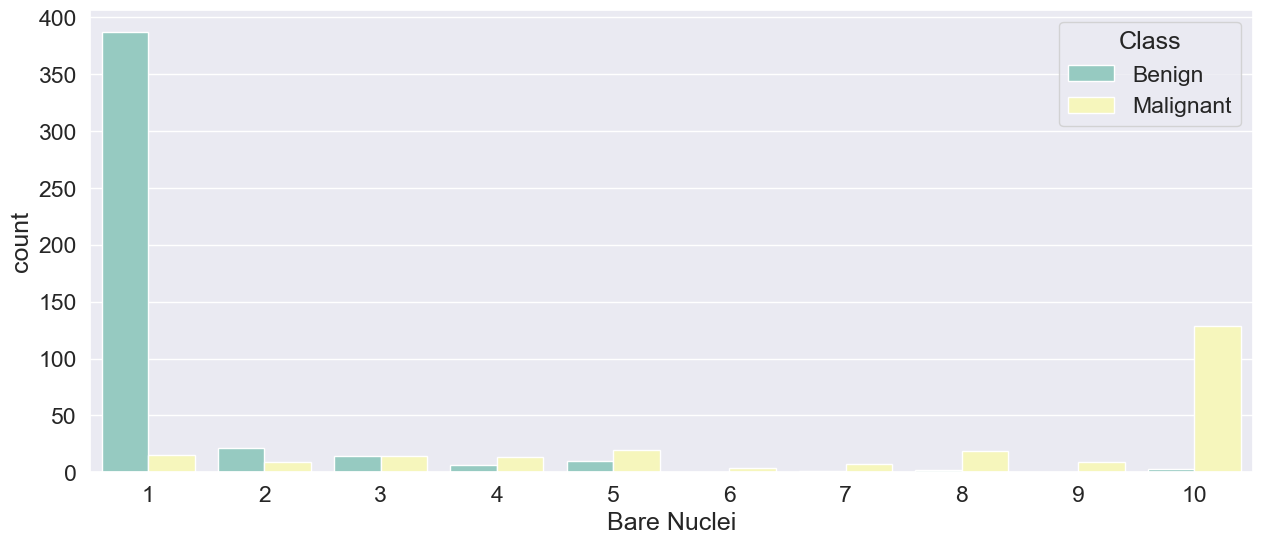

In [68]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bare Nuclei', hue = 'Class', data = df, palette = 'Set3')
plt.show()

For Bare Nuclei a value of 1 is benign apart from a few values. A value of 4 or above and there is a good chance the cancer is malignant. Bare Nuclei could be a good predictor of whether the cancer is Benign or Malignant.

##### Single Epithelial

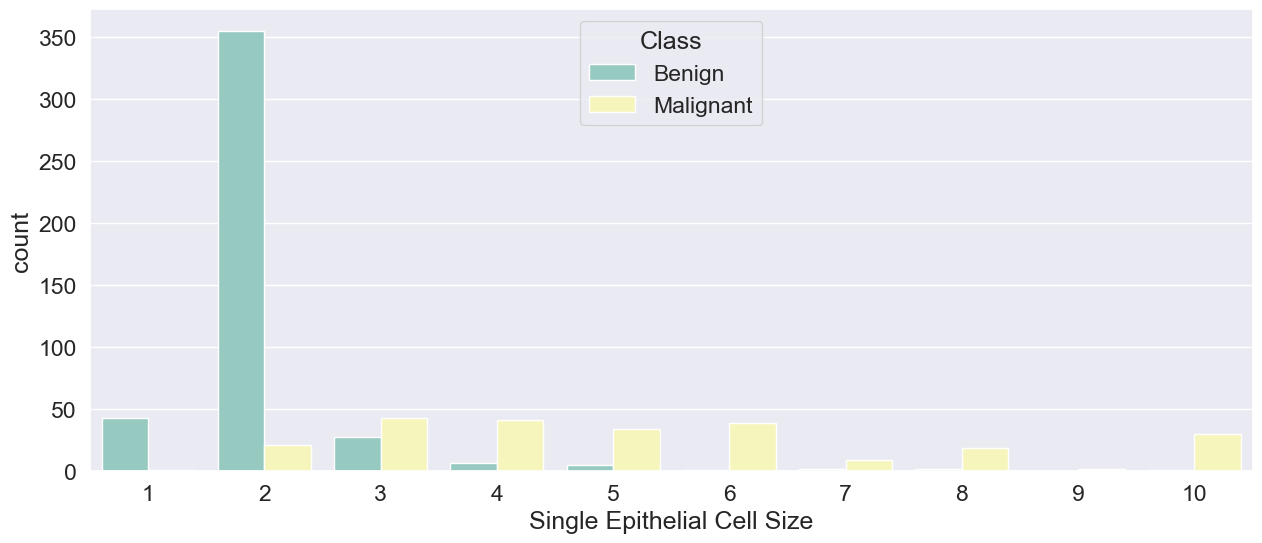

In [69]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Single Epithelial Cell Size', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The median is 2 for Single Epithelial Size and if the value is 2 or under its Benign, if its 4 or above the chances are the Cancer is Malignant. 

##### Mitoses

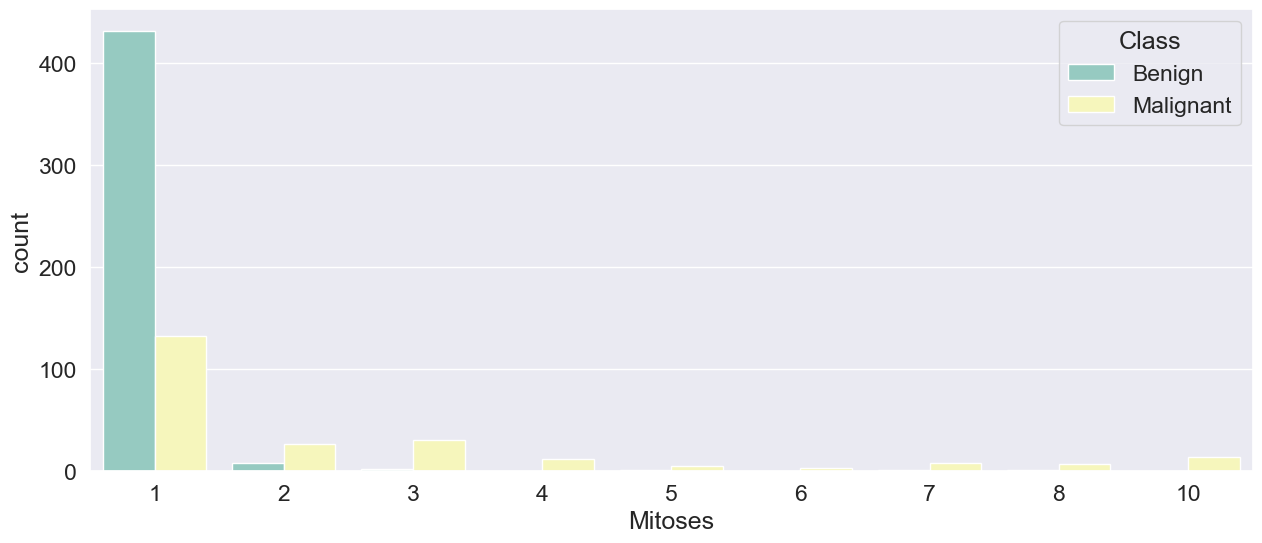

In [70]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Mitoses', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The median for Mitoses is 1 so you can see that 550 out of 683 records fall here. For the value 1 75% are Benign and 25% are Malignant so it doesn't look like this would be a good predictor. If the value is 3 or above the chances are the Cancer is Malignant. 80% of the data is value 1 and 25% of that are Malignant so it appears that its not a good indicator whether its Benign or Malignant.

##### Uniformity of Cell Size

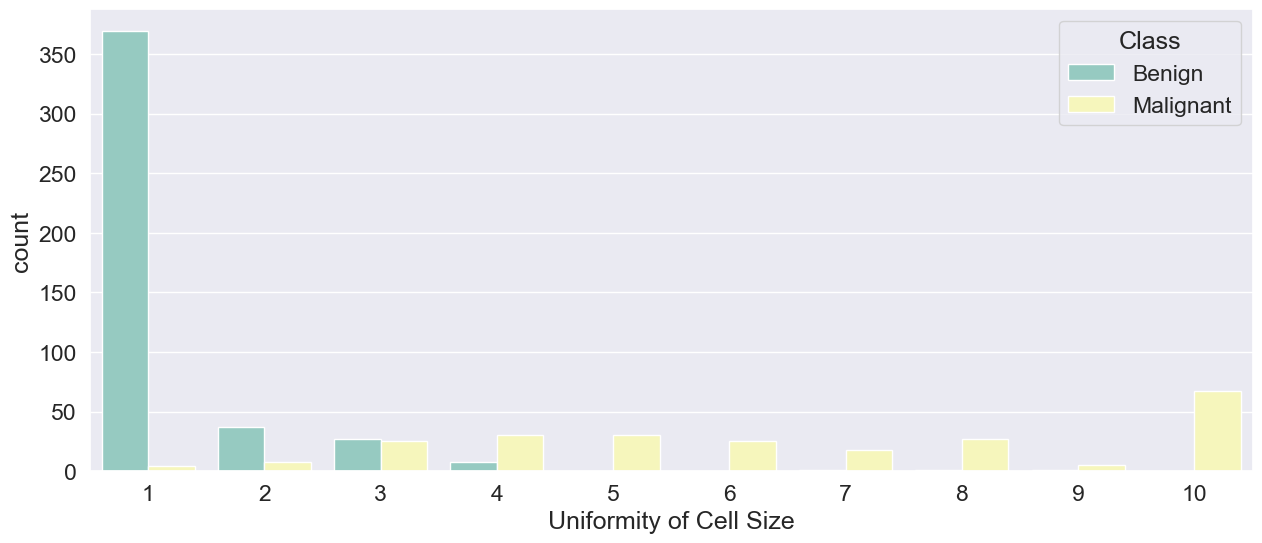

In [71]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Size', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The median for Uniformity of Cell Size is around 1 again and very few data points are Malignant around this value. This could possibly be a good indicator of whether the cancer is Benign or Malignant.

##### Uniformity of Cell Shape

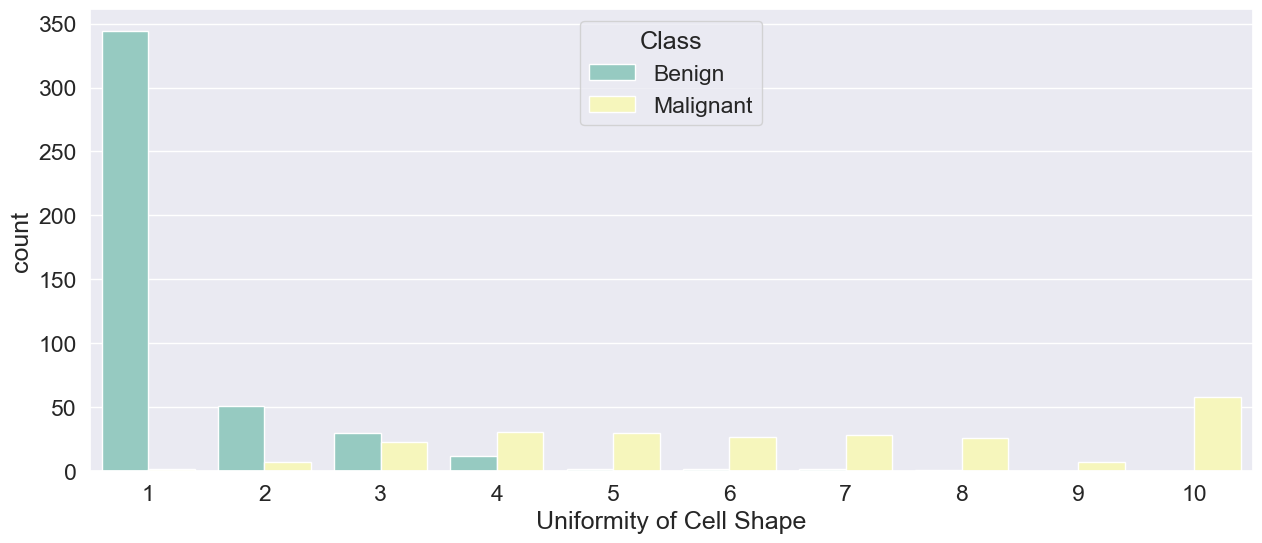

In [72]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Shape', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The median for Uniformity of Cell Shape is around 1 again and very few data points are Malignant around this value. 
This again could be a good indicator of whether the cancer is Benign or Malignant.

##### Marginal Adhesion

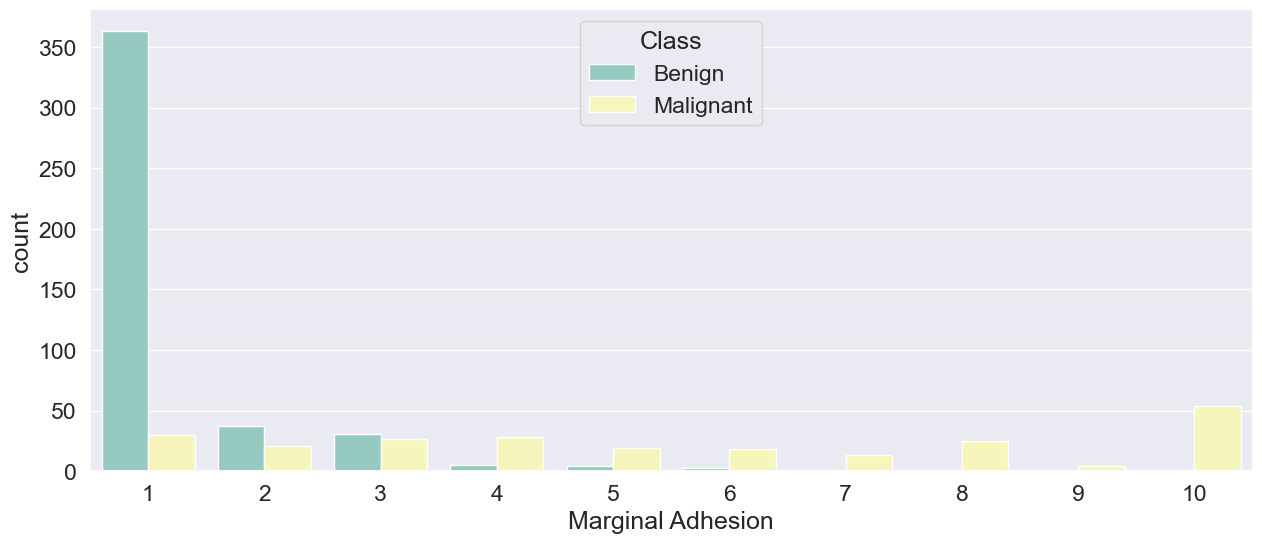

In [73]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Marginal Adhesion', hue = 'Class', data = df, palette = 'Set3')
plt.show()

For Marginal Adhesion the median is 1 and the majority of values for Benign fall between 1 and 3. Again high values of 4 and above indicate the cancer is Malignant. 

##### Bland Chromatin

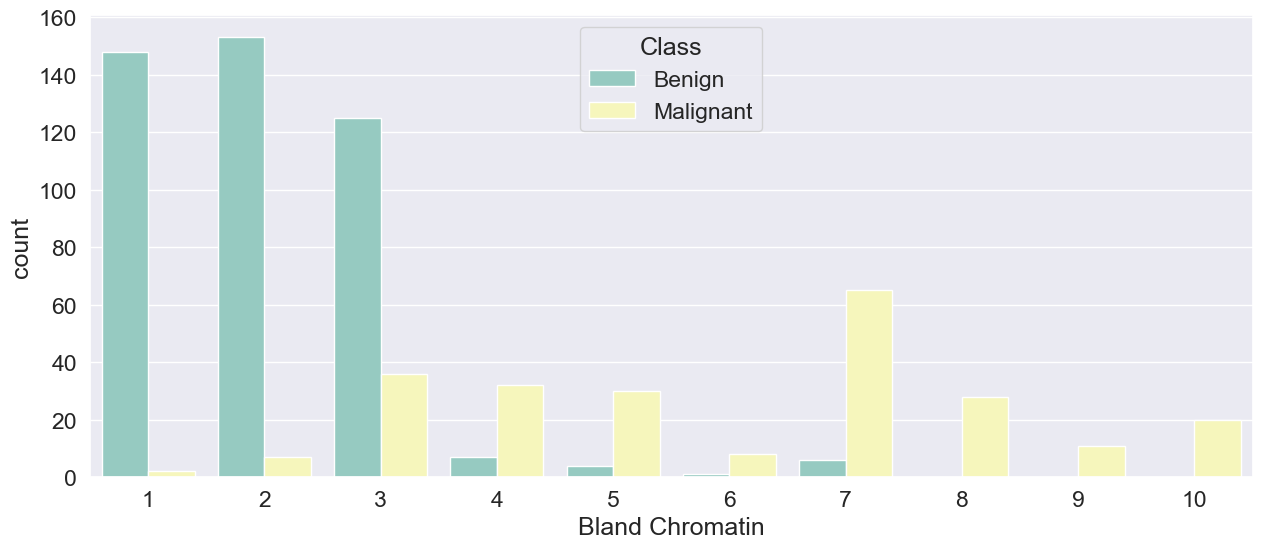

In [74]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bland Chromatin', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The median for Bland Chromatin is 3. Again low numbers especially 1 and 2 indicate Benign whereas 4 and above indicate the cancer is Malignant. This maybe a good predictor but we will see when we carry out the multivariate analysis.

##### Normal Nucleoli

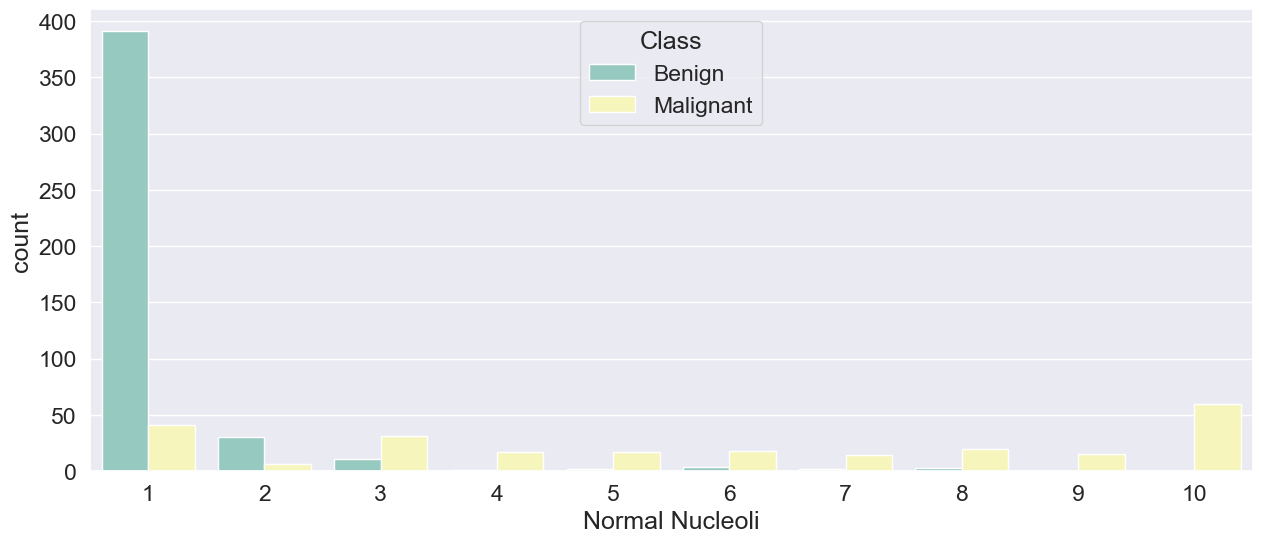

In [75]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Normal Nucleoli', hue = 'Class', data = df, palette = 'Set3')
plt.show()

For Normal Nucleoli nearly 50% of the count is 1. Values 1 or 2 indicate Benign and values 3 and above indicate the Cancer is Malignant.

#### Correlation Coefficient

Using the Correlation Coeffoicient we can tell what variables have a positive correlation or relationship with teh Clas variable. These variables will be the strongest indicators to predict whether the Cancer is Benign or Malignant.

I need to change the Class back to an integer to carry out the corelation coefficient.

In [77]:
# Change the object from Benign and integer to 2 and 4 it will be easier to review.
df.loc[df["Class"] == 'Benign', "Class"] = 2
df.loc[df["Class"] == 'Malignant', "Class"] = 4

In [78]:
# Check what type each attribute is 
df.dtypes

Sample code number id number     int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                      int32
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                           object
dtype: object

In [79]:
# convert Bare Nuclei from object to integer
df = df.astype({'Class':'int'})

In [80]:
# Check what type each attribute is 
df.dtypes

Sample code number id number    int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                     int32
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int32
dtype: object

##### Correlation Coefficient

In [81]:
df.corr()

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number id number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


Look at the correlation Coefficient values under the Class column there are 3 variables with Correlation Coefficients of 0.82 and they are Uniformity of Cell Size, Uniformity of Cell Shape and Bare Nuclei. If we were to choose a fourth variable it would have to be Bland Chromatin which has a value of 0.75. These 4 variables would be the best indicators to predict whether the Cancer is Benign or Malignant.  

#### Correlation Heatmap

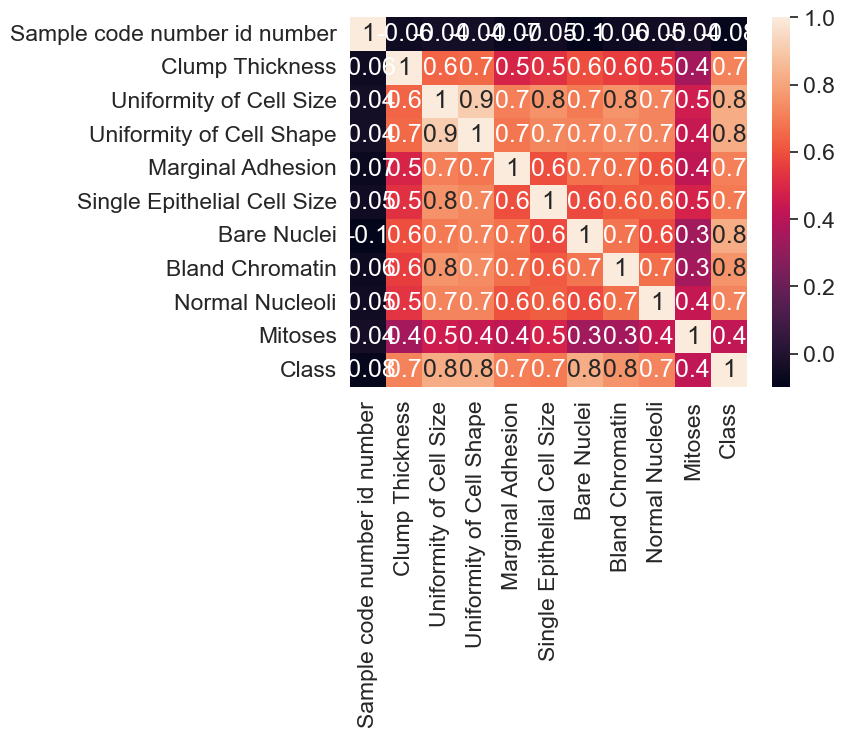

In [83]:
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.show()

The best predictors for the Class attribute from the Correlation heatmap are Bland Chromatin (0.8), Bare Nuclei (0.8), Uniformity of Cell size (0.8) and Uniformity of Cell Shape (0.8).

## 6. Modelling 
***

In [85]:
from scipy.stats import chi2_contingency
import math
#crosstb = pd.crosstab(df.Class, df.Mitoses, normalize=True, margins=True)

In [86]:
#crosstb

In [87]:
df.tail()

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [88]:
df.head()

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [89]:
# assign the Inputs and Outputs to run the Classifiers
inputs = df[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
outputs = df['Class']

#### Chisquare

Here we will use Chisquare to check gain the best attributes to predict whether benign or malignant

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 10 features
select_feature = SelectKBest(chi2, k=5).fit(inputs, outputs)
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feature_chi2 = inputs.columns[select_feature.get_support()]
# let's print some stats
print('total features: {}'.format((inputs.shape[1])))
print('selected features: {}'.format(len(selected_feature_chi2)))
print('Chosen best 5 feature by Chi2:',selected_feature_chi2)

total features: 8
selected features: 5
Chosen best 5 feature by Chi2: Index(['Uniformity of Cell Size', 'Uniformity of Cell Shape',
       'Marginal Adhesion', 'Bland Chromatin', 'Normal Nucleoli'],
      dtype='object')


We can see out of the 8 features tested that chisquare has chosen 5 attributes which are 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Bland Chromatin' and 'Normal Nucleoli'. These results are the same as the correlation tests run earlier where teh same attributes are chosen.

In [93]:
# Just check there are 11 columns and 683 rows in the dataset.
print(df.shape)

(683, 11)


In [94]:
# Checking the counts against the class so there are 444 Benign and 239 Malignant
print(df["Class"].value_counts())

2    444
4    239
Name: Class, dtype: int64


In [95]:
df.isnull().sum()

Sample code number id number    0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                     0
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [96]:
df.dropna(inplace=True)

In [55]:
#df['Clump Thickness'] = df['Clump Thickness'].astype(int)

In [53]:
#df['Uniformity of Cell Size'] = df['Uniformity of Cell Size'].astype(int)

In [54]:
#df['Uniformity of Cell Shape'] = df['Uniformity of Cell Shape'].astype(int)

In [55]:
#df['Marginal Adhesion'] = df['Marginal Adhesion'].astype(int)

In [56]:
#df['Single Epithelial Cell Size'] = df['Single Epithelial Cell Size'].astype(int)

In [57]:
#df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [58]:
#df['Bland Chromatin'] = df['Bland Chromatin'].astype(int)

In [59]:
#df['Normal Nucleoli'] = df['Normal Nucleoli'].astype(int)

In [60]:
#df['Mitoses'] = df['Mitoses'].astype(int)

### KNeighbors Classifier

K-Nearest Neighbor is a classifier that basicvally classifies a data point based on its few nearest neighbors. The value of 'k' determines how many neighbors are used in the classification.  

For Modelling assign the attributes which will be the inputs and the Class attribute will be the output

In [97]:
# Inputs and Outputs
inputs = df[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
outputs = df['Class']

In [98]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [99]:
print(inputs_test.shape)

inputs_test.head()

(226, 8)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
59,9,5,5,2,2,5,1,1
70,5,1,3,1,2,2,1,1
0,5,1,1,1,2,3,1,1
682,5,1,1,1,2,3,2,1
542,5,3,1,1,2,1,1,1


In [100]:
# Get an instance of kNeighbors 
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [101]:
type(df['Sample code number id number'])

pandas.core.series.Series

In [109]:
# fit the 
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [111]:
(knn.predict(inputs_test)==outputs_test).sum()

214

In [122]:
kValue = (knn.predict(inputs_test)==outputs_test).sum()
print("The perecentage of the Class attribute prefixted correctly : ")
(kValue/226)*100

The perecentage of the Class attribute prefixted correctly : 


94.69026548672566

In [123]:
#Y_pred = classifier.predict(inputs_test)
Y_pred = knn.predict(inputs_test)

In [124]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix(outputs_test, Y_pred)

In [125]:
cm

array([[138,   6],
       [  6,  76]], dtype=int64)

In [126]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(outputs_test,Y_pred)

In [127]:
accuracy

0.9469026548672567

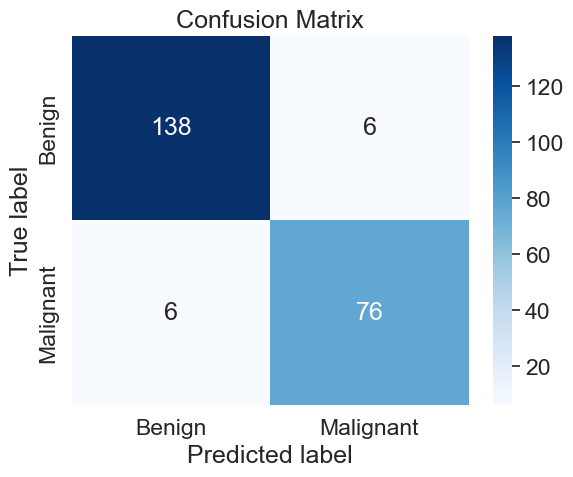

In [128]:
ConfMatrix = confusion_matrix(outputs_test, Y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

True Negative (Top-Left Quadrant)<br/>
False Positive (Top-Right Quadrant)<br/>
False Negative (Bottom-Left Quadrant)<br/>
True Positive (Bottom-Right Quadrant)

In [129]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(outputs_test, Y_pred)

In [130]:
Accuracy

0.9469026548672567

In [ ]:
cohen_kappa_score

In [529]:

print('Accuracy is : ' + str((136 + 77)/(136 + 77 + 8 + 5)))

Accuracy is : 0.9424778761061947


In [530]:
print('Recall is : ' + str((77)/(136 + 5)))

Recall is : 0.5460992907801419


In [531]:
print('Precision is : ' + str((77)/(136 + 77)))

Precision is : 0.3615023474178404


In [532]:
scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='accuracy')

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [533]:
print(scores)

print(scores.mean())

[0.92753623 0.97101449 0.95652174 0.92647059 0.98529412 0.92647059
 0.98529412 0.98529412 0.97058824 0.98529412]
0.961977834612106


accuracy’
‘balanced_accuracy’
‘roc_auc’
‘f1’
‘neg_mean_absolute_error’
‘neg_root_mean_squared_error’
‘r2’

In [534]:
scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='precision')

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Teacher\anaconda3\lib\site-pack

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Teacher\anaconda3\lib\site-pack

In [535]:
print(scores)

print(scores.mean())

[nan nan nan nan nan nan nan nan nan nan]
nan


We need to find the best value of **k** so we can use the for loop below and use a range for k between 1 and 40. I will 10 Cross fold validation and mean accuracy score.

In [536]:
#
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


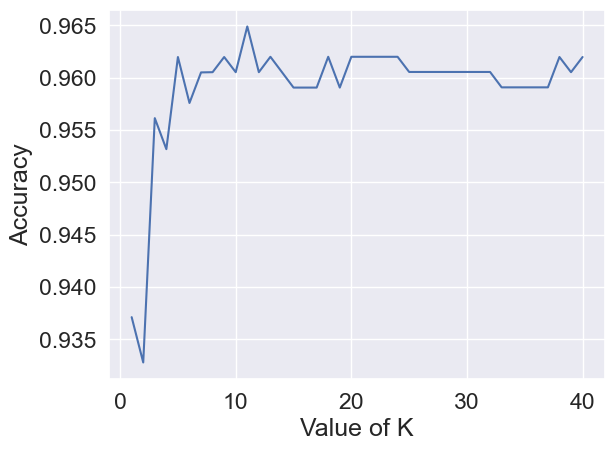

In [537]:
sns.lineplot(x = k_range, y = k_scores)
plt.ylabel("Accuracy")
plt.xlabel("Value of K")
plt.show()

The best value of K for KNeighbors is 11 which gives a mean Acccuracy of 0.965

In [597]:
knn = nei.KNeighborsClassifier(n_neighbors=11)

In [598]:
scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='accuracy')

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [599]:
print(scores)

print(scores.mean())

[0.92753623 0.98550725 0.95652174 0.92647059 0.98529412 0.92647059
 0.98529412 0.98529412 0.98529412 0.98529412]
0.9648976982097185


In [574]:
outputs

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 683, dtype: int32

In [251]:
#Precision = metrics.precision_score(outputs_test, Y_pred)

In [252]:
#Sensitivity_recall = metrics.recall_score(outputs_test, Y_pred)

In [253]:
#Specificity = metrics.recall_score(outputs_test, Y_pred, pos_label=0, 1)

In [254]:
#F1_score = metrics.f1_score(outputs_test, Y_pred)

In [255]:
#metrics
#print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [256]:
print(classification_report(outputs_test, Y_pred))

              precision    recall  f1-score   support

           2       0.96      0.94      0.95       144
           4       0.91      0.94      0.92        82

    accuracy                           0.94       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.94      0.94      0.94       226



In [257]:
#print("Best score is: {}".format(knn.best_score_))

### RandomForest Classifier

In [258]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [259]:
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 10)
#classifier.fit(X_train, Y_train)
classifier.fit(inputs_train, outputs_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=10)

In [260]:
Y_pred = classifier.predict(inputs_test)

In [261]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix(outputs_test, Y_pred)

In [262]:
cm

array([[149,   6],
       [  3,  68]], dtype=int64)

In [263]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(outputs_test,Y_pred)

In [264]:
accuracy

0.9601769911504425

In [265]:
print(classification_report(outputs_test, Y_pred))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       155
           4       0.92      0.96      0.94        71

    accuracy                           0.96       226
   macro avg       0.95      0.96      0.95       226
weighted avg       0.96      0.96      0.96       226



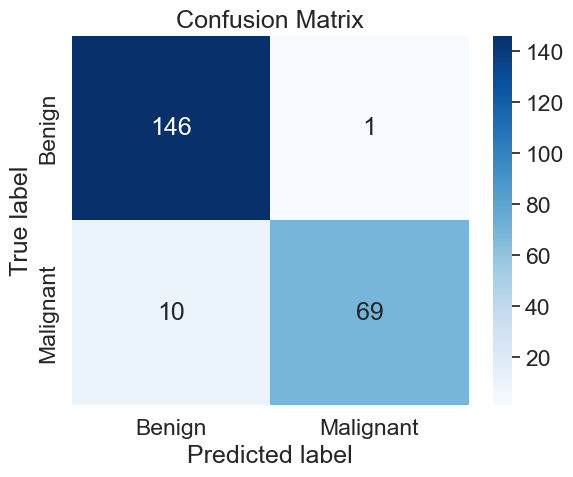

In [87]:
ConfMatrix = confusion_matrix(outputs_test, Y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

- True Negative (Top-Left Quadrant)
- False Positive (Top-Right Quadrant)
- False Negative (Bottom-Left Quadrant)
- True Positive (Bottom-Right Quadrant)

The top left Quadrant is 139 that were predicted as Benign and they are actually Benign so they are correct
The bottom right Quadrant is 78 predicted as Malignant and they are actually Maligant so they are correct
The top right Quadrant are 7 predicted as Benign but actually are Malignant so this is not good
The bottom left Quadrant shows 2 predicted as Malignant and they are actually Benign. At least these patients would get a second test and may show up as Benign.

Cross fold validation

In [88]:
#RandomForest = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 10)
RandomForest = RandomForestClassifier(n_estimators = 400, max_depth = 5, criterion = 'entropy')

In [587]:
scores = cross_val_score(RandomForest, inputs, outputs, cv=10, scoring='accuracy')

In [588]:
print(scores)

print(scores.mean())

[0.92753623 0.97101449 0.95652174 0.92647059 0.95588235 0.98529412
 0.97058824 0.98529412 0.97058824 0.98529412]
0.9634484228473997


In [97]:
#k_range = range(1, 41)
#k_scores = []

#for k in k_range:
#    knn = nei.KNeighborsClassifier(n_neighbors=k)
#    scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='accuracy')
#    k_scores.append(scores.mean())


estimate_range = range(151, 200)
estimate_scores = []

for n in estimate_range:
    rfc = RandomForestClassifier(n_estimators = n, max_depth = 5, criterion = 'entropy')
    scores = cross_val_score(rfc, inputs, outputs, cv=10, scoring='accuracy')
    estimate_scores.append(scores.mean())

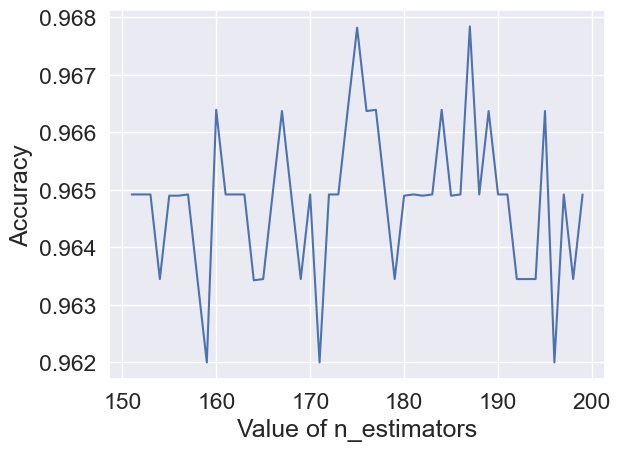

In [98]:
sns.lineplot(x = estimate_range, y = estimate_scores)
plt.ylabel("Accuracy")
plt.xlabel("Value of n_estimators")
plt.show()

### Logistic Regression

In [654]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [655]:
scaler = StandardScaler()
inputs_train = scaler.fit_transform(inputs_train)

In [656]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=10)
model.fit(inputs_train, outputs_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=10,
                   solver='liblinear')

In [657]:
inputs_test = scaler.transform(inputs_test)

In [658]:
y_pred = model.predict(inputs_test)

In [659]:
model.score(inputs_train, outputs_train)

0.949671772428884

In [660]:
model.score(inputs_test, outputs_test)

0.9734513274336283

In [661]:
confusion_matrix(outputs_test, y_pred)

array([[153,   2],
       [  4,  67]], dtype=int64)

In [662]:
cm = confusion_matrix(outputs_test, y_pred)

In [663]:
cm

array([[153,   2],
       [  4,  67]], dtype=int64)

In [664]:
accuracy = accuracy_score(outputs_test,Y_pred)

In [665]:
accuracy

0.9646017699115044

In [666]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(outputs_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       155
           4       0.97      0.94      0.96        71

    accuracy                           0.97       226
   macro avg       0.97      0.97      0.97       226
weighted avg       0.97      0.97      0.97       226



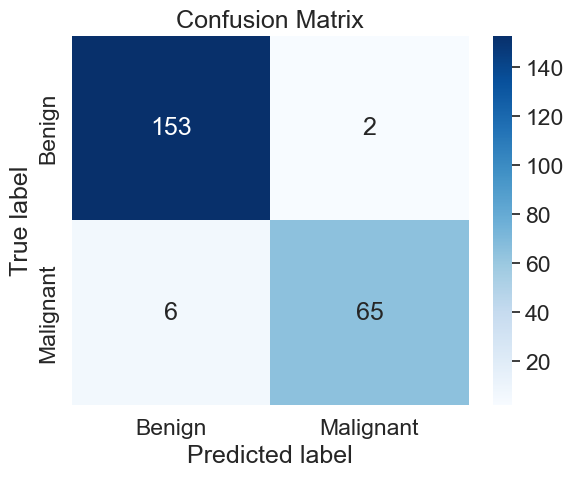

In [667]:
ConfMatrix = confusion_matrix(outputs_test, Y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

- KNeighbor
- Random Forest
- Logistic Regression

In [628]:
params = {'C': [0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty':['none', 'l1', 'l2', 'elasticnet'], 'multi_class':['ovr']}

In [652]:
lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV

In [634]:
logReg = GridSearchCV(estimator=lr, param_grid=params, cv=5, n_jobs=5, verbose=1)

In [635]:
logReg.fit(inputs, outputs)
print(logReg.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}


C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 464, in _check_solver
    raise ValueE

In [649]:
#model = LogisticRegression(solver='saga', C=0.1, multi_class='ovr', penalty = 'l1', random_state=10)
model = LogisticRegression(solver='saga', C=0.1, multi_class='ovr', random_state=10)
scores = cross_val_score(model, inputs, outputs, cv=10, scoring='accuracy')

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

In [650]:
print(scores)

print(scores.mean())

[0.92753623 0.95652174 0.92753623 0.92647059 0.98529412 0.94117647
 0.97058824 0.98529412 0.97058824 0.98529412]
0.9576300085251492


In [673]:
#lr = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=10)
l = LogisticRegression(solver='saga', C=0.1, multi_class='ovr', random_state=10)
scores = cross_val_score(l, inputs, outputs, cv=10, scoring='accuracy')

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

In [674]:
print(scores)

print(scores.mean())

[0.92753623 0.95652174 0.92753623 0.92647059 0.98529412 0.94117647
 0.97058824 0.98529412 0.97058824 0.98529412]
0.9576300085251492


### Gaussian Naive Bayes Classifier

In [133]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()
#model.fit(inputs_train, outputs_train)

# fit the model
gnb.fit(inputs_train, outputs_train)

GaussianNB()

In [134]:
y_pred = gnb.predict(inputs_test)

#y_pred

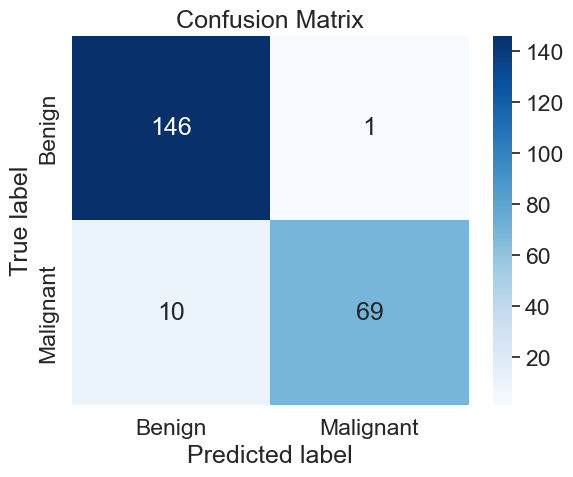

In [135]:
ConfMatrix = confusion_matrix(outputs_test, Y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

In [554]:
# priors=None, var_smoothing=1e-07
gnb = GaussianNB(priors = None, var_smoothing = 1e-07)
scores = cross_val_score(gnb, inputs, outputs, cv=10, scoring='accuracy')

In [555]:
print(scores)

print(scores.mean())

[0.91304348 0.95652174 0.94202899 0.94117647 0.98529412 0.94117647
 0.95588235 0.97058824 0.97058824 0.97058824]
0.9546888320545609


In [556]:
# priors=None, var_smoothing=1e-07
gnb = GaussianNB(priors = None, var_smoothing = 1e-08)
scores = cross_val_score(gnb, inputs, outputs, cv=10, scoring='accuracy')

In [557]:
print(scores)

print(scores.mean())

[0.91304348 0.95652174 0.94202899 0.94117647 0.98529412 0.94117647
 0.95588235 0.97058824 0.97058824 0.97058824]
0.9546888320545609


In [569]:
# priors=None, var_smoothing=1e-07
gnb = GaussianNB(priors = None, var_smoothing = 1e-09)
scores = cross_val_score(gnb, inputs, outputs, cv=10, scoring='accuracy')

In [568]:
print(scores)

print(scores.mean())

[0.91304348 0.95652174 0.94202899 0.94117647 0.98529412 0.94117647
 0.95588235 0.97058824 0.97058824 0.97058824]
0.9546888320545609


In [560]:
# priors=None, var_smoothing=1e-07
gnb = GaussianNB(priors = None, var_smoothing = 1e-10)
scores = cross_val_score(gnb, inputs, outputs, cv=10, scoring='accuracy')

In [561]:
print(scores)

print(scores.mean())

[0.91304348 0.95652174 0.94202899 0.94117647 0.98529412 0.94117647
 0.95588235 0.97058824 0.97058824 0.97058824]
0.9546888320545609


In [565]:
# priors=None, var_smoothing=1e-07
gnb = GaussianNB(priors = None, var_smoothing = 1e-11)
scores = cross_val_score(gnb, inputs, outputs, cv=10, scoring='accuracy')

In [566]:
print(scores)

print(scores.mean())

[0.91304348 0.95652174 0.94202899 0.94117647 0.98529412 0.94117647
 0.95588235 0.97058824 0.97058824 0.97058824]
0.9546888320545609


### Support Vector Machine Classifier

In [290]:
#Create a svm Classifier
#clf = svm.SVC(kernel='linear') # Linear Kernel
clf = svm.SVC(kernel='linear') # Linear Kernel

In [291]:
scores = cross_val_score(clf, inputs, outputs, cv=10, scoring='accuracy')

In [292]:
print(scores)

print(scores.mean())

[0.92753623 0.97101449 0.94202899 0.92647059 0.98529412 0.97058824
 0.95588235 0.98529412 0.97058824 0.98529412]
0.961999147485081


In [293]:
#clf = svm.SVC(kernel='linear') # Linear Kernel
clf = svm.SVC(kernel='rbf') # Linear Kernel

In [294]:
scores = cross_val_score(clf, inputs, outputs, cv=10, scoring='accuracy')

In [295]:
print(scores)

print(scores.mean())

[0.89855072 0.95652174 0.94202899 0.92647059 0.98529412 0.95588235
 0.97058824 0.98529412 0.97058824 0.98529412]
0.9576513213981244


In [349]:
svc = svm.SVC()
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf', 'linear', 'sigmoid', 'poly']}

clf = GridSearchCV(estimator=svc, param_grid=params, cv=5, n_jobs=5, verbose=1)

In [350]:
clf.fit(inputs, outputs)
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [577]:
clf = svm.SVC(C=0.1, gamma=1, kernel='linear') # Linear Kernel

In [578]:
scores = cross_val_score(clf, inputs, outputs, cv=5, scoring='accuracy')

In [579]:
print(scores)

print(scores.mean())

[0.95620438 0.93430657 0.97810219 0.98529412 0.97794118]
0.9663696865607557


In [582]:
scores = cross_val_score(clf, inputs, outputs, cv=5, scoring='f1_macro')

In [583]:
print(scores)

print(scores.mean())

[0.95141844 0.92883117 0.97606151 0.98357488 0.97596465]
0.9631701295760745


## Forest

In [351]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf', 'linear', 'sigmoid', 'poly']}

clf = GridSearchCV(estimator=svc, param_grid=params, cv=5, n_jobs=5, verbose=1)

In [352]:
clf.fit(inputs, outputs)
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [600]:
#params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf', 'linear', 'sigmoid', 'poly']}
#params = {'n_estimators': [250], 'max_depth': [24], 'criterion':['entropy']}
params = {'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400], 'max_depth': [2, 3, 4, 5], 'criterion': ['entropy', 'gini']}

In [601]:
rfc = RandomForestClassifier()
rfc = GridSearchCV(estimator=rfc, param_grid=params, cv=5, n_jobs=5, verbose=1)

In [602]:
rfc.fit(inputs, outputs)
print(rfc.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}


Get accuracy

In [603]:
forest = RandomForestClassifier(n_estimators = 140, max_depth = 3, criterion = 'entropy')

In [604]:
scores = cross_val_score(forest, inputs, outputs, cv=10, scoring='accuracy')

In [605]:
print(scores)

print(scores.mean())

[0.94202899 0.97101449 0.95652174 0.92647059 0.95588235 0.98529412
 0.97058824 0.98529412 0.97058824 0.98529412]
0.9648976982097188


## 7. Comparison of Literature Reviews on Classifiers with my Findings
***

| Ranking | Classifier | Literature Review  | Accuracy Score | F1 Score | 
| :---: | :---: | :---: | :---: | :---: | 
| 1 | Naïve Bayes | Literature Review 2 | 97.36 | 0 | 
| 2 | Naïve Bayes | Literature Review 1 | 97.27 |	0 |
| 3 | SVM | Literature Review 3 | 97.14 | 0 | 
| 4 | Random Forest | Literature Review 3 |	97.14 | 0 | 
| 5 | FLANN | Literature Review 2 | 97.14 | 0 | 
| 6 | RBF Network | Literature Review 2 | 96.77 | 0 | 
| 7 | SVM | John's Analysis | 96.63 |	0 |
| 8 | KNN | John's Analysis | 96.48 | 0 | 
| 9 | Naïve Bayes | Literature Review 3 | 96.42 | 0 | 
| 10 | SMO | Literature Review 1 | 96.13 | 0 | 
| 11 | Multilayer Perceptron | Literature Review 1 | 96.13 |	0 |
| 12 | Random Forest | John's Analysis | 96.05 | 0 | 
| 13 | Logistic Regression | John's Analysis |	95.76 | 0 | 
| 14 | KNN | Literature Review 3 | 95.71 | 0 | 
| 15 | Random Forest | Literature Review 1 | 95.56 | 0 | 
| 16 | Gaussain Naïve Bayes | John's Analysis | 95.46 | 0 |
| 17 | MLP | Literature Review 3 | 95.28 | 0 | 
| 18 | R48 | Literature Review 1 |	94.26 | 0 | 
| 19 | R48 | Literature Review 2 | 93.41 | 0 | 

## 8. Discuss How Dataset Could be Extended
***

In [10]:
from sdv.tabular import GaussianCopula

In [34]:
model = GaussianCopula()
model.fit(df)

In [35]:
sample = model.sample(10000)
sample.head()

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,745360,1,1,1,1,1,1,1,1,1,Benign
1,295958,5,3,3,4,2,4,7,2,4,Benign
2,113911,10,5,6,4,6,9,6,5,3,Benign
3,946729,8,5,6,3,4,4,4,6,4,Malignant
4,1250780,9,8,5,6,5,6,4,5,3,Benign


In [36]:
from sdv.evaluation import evaluate
evaluate(sample, df, metrics=['CSTest'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,0.953141,0.953141,0.0,1.0,MAXIMIZE,None


In [37]:
sample['Class']

0          Benign
1          Benign
2          Benign
3       Malignant
4          Benign
          ...    
9995       Benign
9996       Benign
9997       Benign
9998       Benign
9999       Benign
Name: Class, Length: 10000, dtype: object

In [38]:
# Check number rows and columns
print(df.shape)

# Count by Class attribute so we can see number of Benigns and Malignant
print(sample["Class"].value_counts())

(683, 11)
Benign       6781
Malignant    3219
Name: Class, dtype: int64


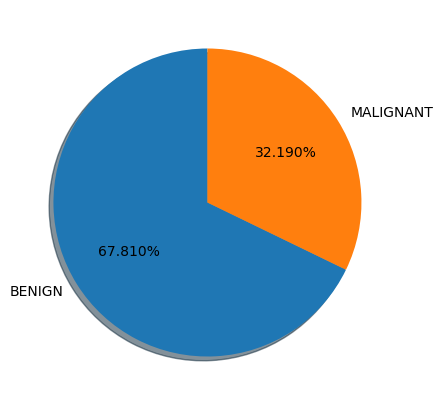

In [39]:
# Create a Pie Chart by Class to show the percentage of Benign and Malignant 
plt.figure(figsize=(5,5))
plt.pie(sample['Class'].value_counts(),startangle=90,autopct='%1.3f%%',labels=['BENIGN','MALIGNANT'],shadow=True)
plt.show()

## 9. References
***

https://www.sciencedirect.com/science/article/pii/S2352914820306092

https://rpubs.com/gregmaghakian/429325

https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/

https://www.w3schools.com/python/python_ml_confusion_matrix.asp

https://www.v7labs.com/blog/confusion-matrix-guide

https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf

https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-gnb


https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/

https://pyonlycode.com/post/how-to-solve-nameerror-name-logisticregression-is-not-defined-sklearn/


## END
***